# Quarterly-Shipment-Analysis-of-a-Courier-Company

#### Basic Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data in a quarterly Time Series Format.

In [2]:
df=pd.read_csv('ApplianceShipments.csv')
df.head()

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123


## 2. Plot the Time Series data.

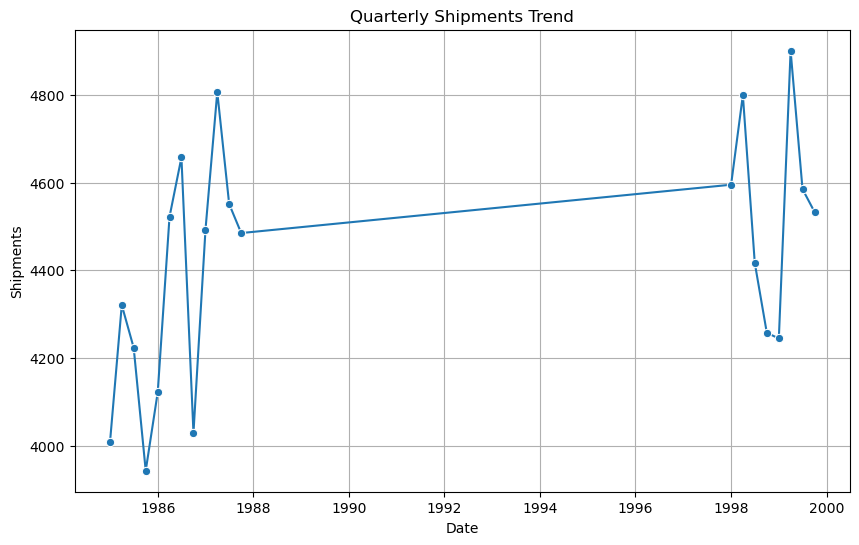

In [4]:
# Convert 'Quarter' and 'Year' columns to datetime format
df['Date'] = df['Year'].astype(str) + '-' + df['Quarter']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the quarterly shipment trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Shipments', marker='o')
plt.title('Quarterly Shipments Trend')
plt.xlabel('Date')
plt.ylabel('Shipments')
plt.grid(True)
plt.show()

## Find the basic measures of descriptive statistics for this time series across quarters of different years.

In [5]:
# Basic measures of descriptive statistics
descriptive_stats = df.groupby([df.index.year, df.index.quarter])['Shipments'].describe()

# Display the statistics
print(descriptive_stats)


           count    mean  std     min     25%     50%     75%     max
Date Date                                                            
1985 1       1.0  4009.0  NaN  4009.0  4009.0  4009.0  4009.0  4009.0
     2       1.0  4321.0  NaN  4321.0  4321.0  4321.0  4321.0  4321.0
     3       1.0  4224.0  NaN  4224.0  4224.0  4224.0  4224.0  4224.0
     4       1.0  3944.0  NaN  3944.0  3944.0  3944.0  3944.0  3944.0
1986 1       1.0  4123.0  NaN  4123.0  4123.0  4123.0  4123.0  4123.0
     2       1.0  4522.0  NaN  4522.0  4522.0  4522.0  4522.0  4522.0
     3       1.0  4657.0  NaN  4657.0  4657.0  4657.0  4657.0  4657.0
     4       1.0  4030.0  NaN  4030.0  4030.0  4030.0  4030.0  4030.0
1987 1       1.0  4493.0  NaN  4493.0  4493.0  4493.0  4493.0  4493.0
     2       1.0  4806.0  NaN  4806.0  4806.0  4806.0  4806.0  4806.0
     3       1.0  4551.0  NaN  4551.0  4551.0  4551.0  4551.0  4551.0
     4       1.0  4485.0  NaN  4485.0  4485.0  4485.0  4485.0  4485.0
1998 1       1.0  45

## 3. Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

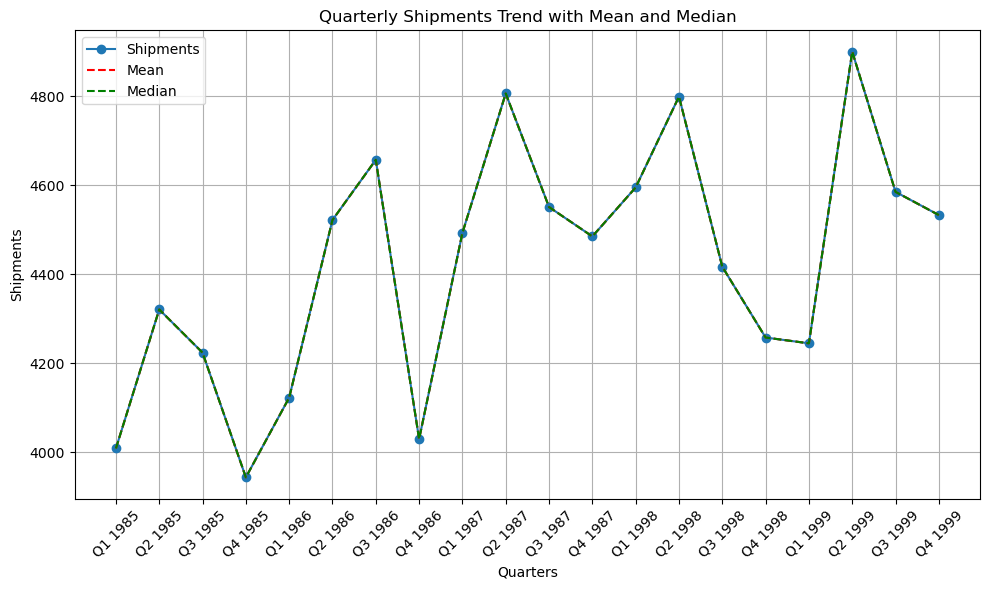

In [14]:
import numpy as np

# Calculate mean and median
mean_shipments = df.groupby(['Year', 'Quarter'])['Shipments'].mean().reset_index()
median_shipments = df.groupby(['Year', 'Quarter'])['Shipments'].median().reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
quarters = np.arange(len(mean_shipments))

plt.plot(quarters, df['Shipments'], label='Shipments', marker='o', linestyle='-')

# Plot mean and median
plt.plot(quarters, mean_shipments['Shipments'], label='Mean', color='red', linestyle='--')
plt.plot(quarters, median_shipments['Shipments'], label='Median', color='green', linestyle='--')

plt.title('Quarterly Shipments Trend with Mean and Median')
plt.xlabel('Quarters')

# Convert 'Year' to string before concatenating
plt.ylabel('Shipments')
plt.xticks(quarters, mean_shipments['Quarter'] + ' ' + mean_shipments['Year'].astype(str), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Plot a quarterly comparison of the shipments using a barplot.

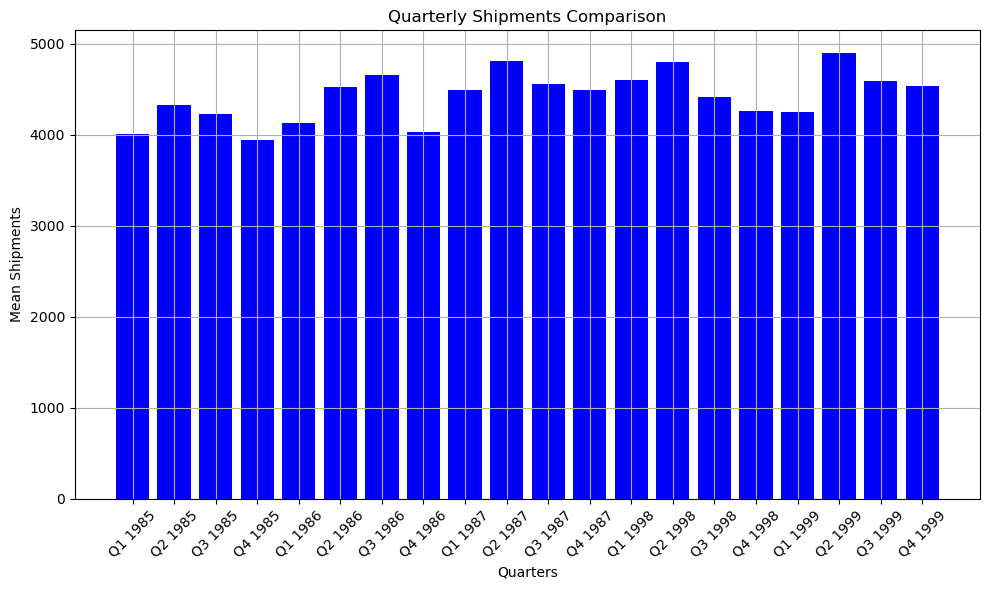

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df contains the shipment data with columns 'Year', 'Quarter', and 'Shipments'

# Calculate mean shipments by quarter
mean_shipments = df.groupby(['Year', 'Quarter'])['Shipments'].mean().reset_index()

# Define quarters for x-axis
quarters = np.arange(len(mean_shipments))

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(quarters, mean_shipments['Shipments'], color='blue')

# Customize the plot
plt.title('Quarterly Shipments Comparison')
plt.xlabel('Quarters')
plt.ylabel('Mean Shipments')
plt.xticks(quarters, mean_shipments['Quarter'] + ' ' + mean_shipments['Year'].astype(str), rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()



## 5. Plot the year on year quarterly comparison of the shipments.

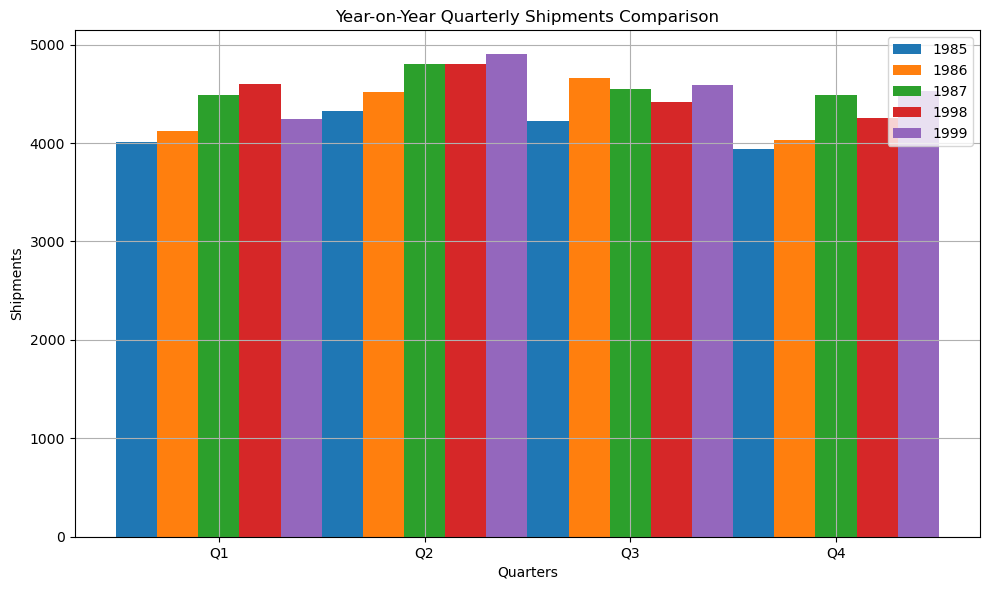

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df contains the shipment data with columns 'Year', 'Quarter', and 'Shipments'

# Pivot the data to have years as columns and quarters as rows
pivot_df = df.pivot(index='Quarter', columns='Year', values='Shipments')

# Define quarters for x-axis
quarters = np.arange(len(pivot_df))

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
for i, year in enumerate(pivot_df.columns):
    plt.bar(quarters + i * bar_width, pivot_df[year], width=bar_width, label=str(year))

# Customize the plot
plt.title('Year-on-Year Quarterly Shipments Comparison')
plt.xlabel('Quarters')
plt.ylabel('Shipments')
plt.xticks(quarters + bar_width * (len(pivot_df.columns) - 1) / 2, pivot_df.index)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


## 6. Plot the distribution plot for quarterly comparison of the shipments.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


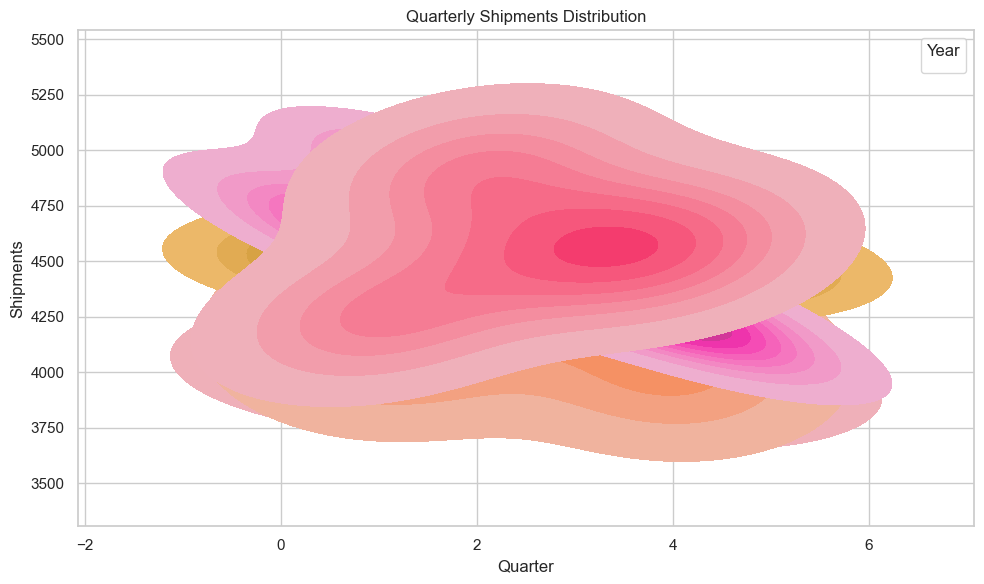

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the shipment data with columns 'Year', 'Quarter', and 'Shipments'

# Map quarters to numeric values
quarter_mapping = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
df['Quarter_Num'] = df['Quarter'].map(quarter_mapping)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Quarter_Num', hue='Year', y='Shipments', fill=True, palette='husl')

# Customize the plot
plt.title('Quarterly Shipments Distribution')
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.legend(title='Year')

# Show plot
plt.tight_layout()
plt.show()



## 7. Decompose the data and check the trend, seasonality and the irregular/residual/error component.

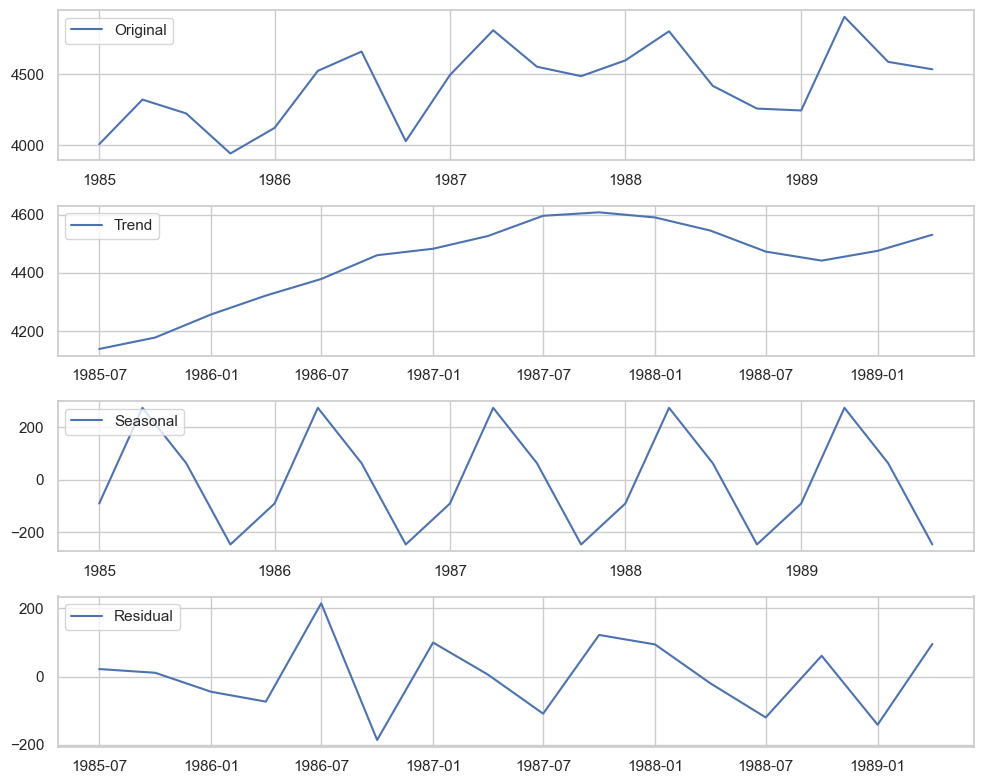

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df contains the shipment data with columns 'Year', 'Quarter', and 'Shipments'

# Combine 'Year' and 'Quarter' into a single datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'])

# Create a quarterly period index
period_index = pd.period_range(start=df['Date'].min(), periods=len(df), freq='Q')

# Convert the period index to a datetime index
datetime_index = period_index.to_timestamp()

# Set the datetime index as the index of the DataFrame
df.set_index(datetime_index, inplace=True)

# Decompose the time series data
decomposition = seasonal_decompose(df['Shipments'], model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(411)
plt.plot(df['Shipments'], label='Original')
plt.legend(loc='upper left')

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Irregular component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# End
